**Data loading**

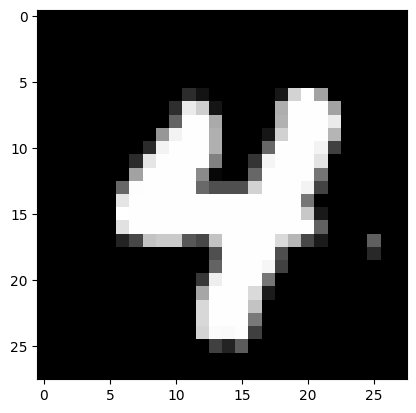

4
(60000, 784)
(60000,)


In [9]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

random_img_index = random.randint(1,60000)

#visualization
image = train_images[random_img_index]

fig=plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#flattening to matrix
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
print(train_labels[random_img_index])



print(train_images.shape)
print(train_labels.shape)


**Model**

In [16]:
epoch = 5

def softmax_activation(z):
    z = z - np.max(z)
    e = np.exp(z)
    return e / np.sum(e)

def sigmoid_activation(x):
    return 1/(1 + np.exp(-x))

def cost_crossentropy(q, p):
    return -np.mean(np.sum(p * np.log(q), axis=1))

# 100x784.784x1 -> 100x1
# 10x100 . 100x1 -> 10x1

def feed_forward(samples, hidden_weights, hidden_bias, output_weights, output_bias):
    output_matrix = np.zeros((len(samples), 10))
    hidden_matrix = np.zeros((len(samples) ,500))
    
    for i, sample in enumerate(samples):                
        # Hidden Layer
        # 100 x 784 x 784 x 1 
        # 100 x 1
        hidden_nodes = (hidden_weights @ sample) + hidden_bias
        hidden_nodes_activated = sigmoid_activation(hidden_nodes) 
        hidden_matrix[i] = hidden_nodes_activated

        # Output Layer
        output_nodes = (output_weights @ hidden_nodes_activated) + output_bias
        output_nodes_activated = softmax_activation(output_nodes)
        output_matrix[i] = output_nodes_activated


    # returning 30 x 10, 30 x 100 matricies
    return output_matrix, hidden_matrix

def cost_computation(predictions, labels):
    one_hot_matrix = np.zeros((len(predictions), 10))
    for i, v in enumerate(labels):
        one_hot_matrix[i][v] = 1
    return cost_crossentropy(predictions, one_hot_matrix), one_hot_matrix
    
def backpropogation(inputs, one_hot_matrix , hidden_activations, hidden_weights, hidden_bias, predictions, output_weights, output_bias, lr = 0.1):
    # 30 x 10
    error = predictions - one_hot_matrix

    # 10 x 30 . 30 x 100
    output_gradient = ((1/30)*(error.T)) @ hidden_activations

    # 30 x 10    
    output_bias_change = (1/30)*np.sum(error, axis=0)


    sig_prime = hidden_activations * (1-hidden_activations)
    # 30 x 10 . 10 x 100 = 30 x 100
    hidden_change = (error @ output_weights) * sig_prime
    # 100 x 30 . 30 x 1
    hidden_gradient = (hidden_change.T @ inputs) / 30
    hidden_bias_change = np.sum(hidden_change, axis = 0) / 30

    output_weights -= lr * output_gradient
    output_bias -= lr * output_bias_change
    hidden_weights -= lr * hidden_gradient
    hidden_bias -= lr * hidden_bias_change

    return output_weights, output_bias, hidden_weights, hidden_bias

#---------------{Defining the first pass}------------------
# Define different random weights for each epoch
hidden_weights = np.random.uniform(-0.5, 0.5, (500, 784))
hidden_bias = np.zeros((500,))

batch_size = 30

output_weights = np.random.uniform(-0.5, 0.5, (10, 500))
output_bias = np.zeros((10,))


for e in range(epoch):
    input_nodes = train_images / 255
    input_labels = train_labels
    #------------------------{Training}----------------------------------
    for i in range(int(60000 / batch_size)):
        batch = input_nodes[:batch_size]
        batch_labels = input_labels[:batch_size]
        
        input_nodes = input_nodes[batch_size:]
        input_labels = input_labels[batch_size:]
        
        output_matrix, hidden_matrix = feed_forward(batch, hidden_weights, hidden_bias, output_weights, output_bias)

        cost, one_hot_matrix = cost_computation(output_matrix, batch_labels)

        #-----------------------{Back Propogation}-----------------------

        output_weights, output_bias,  hidden_weights, hidden_bias = backpropogation(batch, one_hot_matrix, hidden_matrix, hidden_weights, hidden_bias, output_matrix, output_weights, output_bias, lr = 0.5)
    
    # Evaluate on full test set
    test_output, _ = feed_forward(test_images / 255, hidden_weights, hidden_bias, output_weights, output_bias)
    pred_labels = np.argmax(test_output, axis=1)
    acc = np.mean(pred_labels == test_labels)
    print("epoch", e, "loss", cost, "acc", acc)



epoch 0 loss 0.03361093091525489 acc 0.9486
epoch 1 loss 0.010713228163052766 acc 0.9606
epoch 2 loss 0.006925577913266769 acc 0.9674
epoch 3 loss 0.0057525239714902535 acc 0.9704
epoch 4 loss 0.005280048053214635 acc 0.9723
